In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


# Covariance

# 2d variance

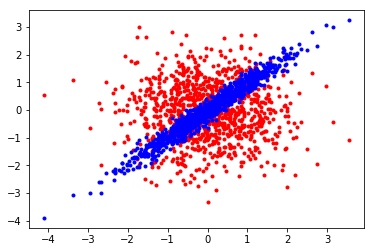

In [2]:
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Mean centering

In [1]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],2))*mu

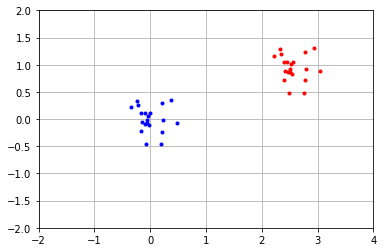

In [11]:
n=20
mu = [2.5, 1]
mu_add = np.ones((n,2))*mu
Xa = np.random.randn(n,2)*0.25
Xa = Xa + mu_add
Ya = mean_centering(Xa)

plt.plot(Xa[:,0], Xa[:,1], 'r.')
plt.plot(Ya[:,0], Ya[:,1], 'b.')
plt.axis([-2,4,-2,2]); plt.grid()

In [5]:
Z = np.dot(Y,Y.T)
Z

array([[979.18316541, 951.05167118],
       [951.05167118, 966.38947644]])

Proportional to [[1,0.98],[0.98,1]]

# Principal axes of variation

1.7000000000000002 [0.70710678 0.70710678]


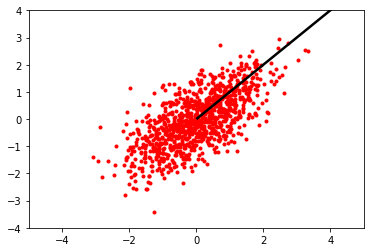

0.30000000000000016 [-0.70710678  0.70710678]


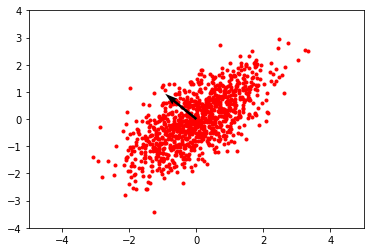

In [13]:
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)
w,v = la.eig(Cb)

for i in range(len(w)):
    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.show()

# Linear Transform

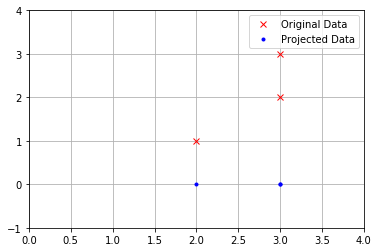

In [7]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[1,0],[0,0]]) #projects on to x axis
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([0,4,-1,4])
plt.grid()
plt.legend()

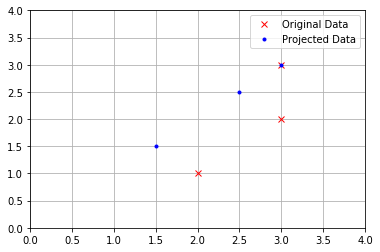

In [8]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[.5,.5],[.5,.5]]) #projects on to line x=y
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([0,4,0,4])
plt.grid()
plt.legend()

In [15]:
Xe = np.array([[2,1],[3,2],[3,3]])
X_mc = mean_centering(Xe)
Z = np.dot(X_mc.T,X_mc); w,v = la.eig(Z)
idx = w.argsort()[::-1]   #to sort the eig vals and vecs in to decending order
w = w[idx]; v = v[:,idx]

2.5351837584879964 [-0.47185793 -0.8816746 ]


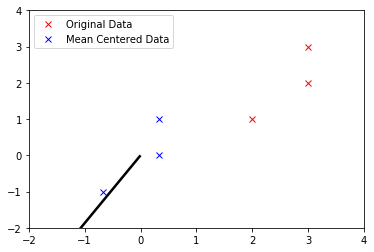

0.13148290817867014 [-0.8816746   0.47185793]


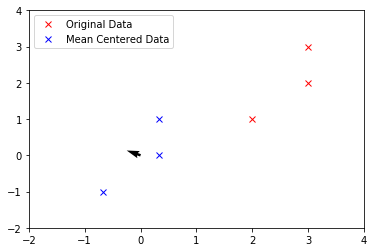

In [17]:
for i in range(len(w)):
    plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
    plt.plot(X_mc[:,0], X_mc[:,1], 'bx', label="Mean Centered Data")
    plt.axis([-2,4,-2,4]); plt.legend(); print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(3/w[i]), zorder=2); plt.show()

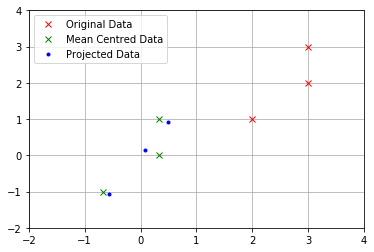

In [10]:
pa =v[:,0]
projection_matrix = np.outer(pa,pa.T) #P = aa^T to project along vector a
Xp = np.dot(Xe, projection_matrix)
Xp = mean_centering(Xp)
plt.plot(Xe[:,0], Xe[:,1], 'rx', label="Original Data")
plt.plot(X_mc[:,0], X_mc[:,1], 'gx', label="Mean Centred Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([-2,4,-2,4])
plt.grid()
plt.legend()

Singular value decomposition